In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics

In [24]:
inputs_train = pd.read_csv('inputs_train.csv', index_col=0)
targets_train = pd.read_csv('targets_train.csv', index_col=0)
inputs_test = pd.read_csv('inputs_test.csv', index_col=0)
targets_test = pd.read_csv('targets_test.csv', index_col=0)

In [25]:
pd.options.display.max_columns = None

In [26]:
inputs_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,person_home_ownership:OTHER_RENT,person_age:<=22,person_age:23-28,person_age:29-33,person_age:34-37,person_age:>=38,person_income_factor,person_income:<=20K,person_income:20K-34K,person_income:34K-52.5K,person_income:52.5K-66.5K,person_income:66.5K-75.7K,person_income:>75.7K,person_emp_length:<=2,person_emp_length:3-7,person_emp_length:8-10,person_emp_length:>10,loan_amnt_factor,loan_amnt:<=3260,loan_amnt:3260-8090,loan_amnt:8090-12230,loan_amnt:12230-18440,loan_amnt:>18440,loan_int_rate_factor,loan_int_rate:<=6.488,loan_int_rate:6.488-9.692,loan_int_rate:9.692-10.76,loan_int_rate:10.76-13.964,loan_int_rate:13.964-15.388,loan_int_rate:15.388-17.88,loan_int_rate:>17.88,loan_percent_income_factor,loan_percent_income:<=6.64pct,loan_percent_income:6.64-14.9pct,loan_percent_income:14.9-16.6pct,loan_percent_income:16.6-29.9pct,loan_percent_income:29.9-31.5pct,loan_percent_income:>31.5pct
24386,31,50000,RENT,1.0,MEDICAL,B,10000,12.69,0,0.20,N,8,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,"(44715.68, 85431.36]",1,1,1,0,0,0,1,0,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(12.54, 12.896]",0,0,0,1,0,0,0,"(0.199, 0.216]",0,0,0,1,0,0
28394,27,80000,MORTGAGE,1.0,EDUCATION,B,20000,11.36,0,0.25,N,8,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,"(44715.68, 85431.36]",1,1,1,1,1,1,1,0,0,0,"(19820.0, 20510.0]",0,0,0,0,1,"(11.116, 11.472]",0,0,0,1,0,0,0,"(0.249, 0.266]",0,0,0,1,0,0
1342,25,28000,RENT,6.0,DEBTCONSOLIDATION,A,1000,7.51,0,0.04,N,3,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,"(1964.216, 44715.68]",1,1,0,0,0,0,0,1,0,0,"(465.5, 1190.0]",1,0,0,0,0,"(7.2, 7.556]",0,1,0,0,0,0,0,"(0.0332, 0.0498]",1,0,0,0,0,0
7051,21,51000,MORTGAGE,5.0,PERSONAL,A,6000,7.88,0,0.12,N,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,"(44715.68, 85431.36]",1,1,1,0,0,0,0,1,0,0,"(5330.0, 6020.0]",0,1,0,0,0,"(7.556, 7.912]",0,1,0,0,0,0,0,"(0.116, 0.133]",0,0,0,0,0,0
8229,26,56004,MORTGAGE,10.0,EDUCATION,C,20000,13.57,0,0.36,Y,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,"(44715.68, 85431.36]",1,1,1,1,0,0,0,0,1,0,"(19820.0, 20510.0]",0,0,0,0,1,"(13.252, 13.608]",0,0,0,1,0,0,0,"(0.349, 0.365]",0,0,0,0,0,1


In [27]:
inputs_train.shape

(26060, 69)

In [28]:
targets_train.shape

(26060, 1)

In [29]:
inputs_test.shape

(6516, 69)

In [30]:
targets_test.shape

(6516, 1)

In [31]:
targets_train.head()

,good_bad
24386,1
28394,1
1342,1
7051,1
8229,1


In [32]:
inputs_train_ref = inputs_train.loc[:,[
'person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age:<=22', 
'person_age:23-28', 
'person_age:29-33', 
'person_age:34-37',  
'person_age:>=38',
'person_income:<=20K', 
'person_income:20K-34K',  
'person_income:34K-52.5K', 
'person_income:52.5K-66.5K', 
'person_income:66.5K-75.7K',  
'person_income:>75.7K',
'person_emp_length:<=2', 
'person_emp_length:3-7', 
'person_emp_length:8-10', 
'person_emp_length:>10',
'loan_amnt:<=3260', 
'loan_amnt:3260-8090', 
'loan_amnt:8090-12230', 
'loan_amnt:12230-18440',  
'loan_amnt:>18440',
'loan_int_rate:<=6.488', 
'loan_int_rate:6.488-9.692', 
'loan_int_rate:9.692-10.76', 
'loan_int_rate:10.76-13.964', 
'loan_int_rate:13.964-15.388', 
'loan_int_rate:15.388-17.88', 
'loan_int_rate:>17.88',
'loan_percent_income:<=6.64pct', 
'loan_percent_income:6.64-14.9pct', 
'loan_percent_income:14.9-16.6pct', 
'loan_percent_income:16.6-29.9pct', 
'loan_percent_income:29.9-31.5pct', 
'loan_percent_income:>31.5pct'
]]

In [33]:
ref_categories = [
'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'person_age:<=22',
'person_income:<=20K',
'person_emp_length:<=2',
'loan_amnt:>18440',
'loan_int_rate:>17.88',
'loan_percent_income:>31.5pct'
]

In [34]:
X_train = inputs_train_ref.drop(ref_categories, axis=1)

In [35]:
X_train.shape

(26060, 41)

In [36]:
y_train = targets_train.values.ravel()

In [37]:
y_train.shape

(26060,)

selected dummy variables:

'person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:OTHER_RENT',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age:<=22', 
'person_age:23-28', 
'person_age:29-33', 
'person_age:34-37',  
'person_age:>=38',
'person_income:<=20K', 
'person_income:20K-34K',  
'person_income:34K-52.5K', 
'person_income:52.5K-66.5K', 
'person_income:66.5K-75.7K',  
'person_income:>75.7K',
'person_emp_length:<=2', 
'person_emp_length:3-7', 
'person_emp_length:8-10', 
'person_emp_length:>10',
'loan_amnt:<=3260', 
'loan_amnt:3260-8090', 
'loan_amnt:8090-12230', 
'loan_amnt:12230-18440',  
'loan_amnt:>18440',
'loan_int_rate:<=6.488', 
'loan_int_rate:6.488-9.692', 
'loan_int_rate:9.692-10.76', 
'loan_int_rate:10.76-13.964', 
'loan_int_rate:13.964-15.388', 
'loan_int_rate:15.388-17.88', 
'loan_int_rate:>17.88',
'loan_percent_income:<=6.64pct', 
'loan_percent_income:6.64-14.9pct', 
'loan_percent_income:14.9-16.6pct', 
'loan_percent_income:16.6-29.9pct', 
'loan_percent_income:29.9-31.5pct', 
'loan_percent_income:>31.5pct'

selected reference categories:

'person_home_ownership:OTHER_RENT',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'person_age:<=22',
'person_income:<=20K',
'person_emp_length:<=2',
'loan_amnt:>18440',
'loan_int_rate:>17.88',
'loan_percent_income:>31.5pct'

# fit the model

In [65]:
reg = LogisticRegression(max_iter=1000)

In [66]:
reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [67]:
reg.intercept_

array([-9.70377857])

In [68]:
feature_name = X_train.columns.values

In [69]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Feature Name,Coefficients
0,Intercept,-9.703779
1,person_home_ownership:OWN,2.705818
2,person_home_ownership:MORTGAGE,0.863346
3,cb_person_default_on_file:N,-0.014240
4,loan_grade:A,3.575763


In [62]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self, X, y):
        self.model.fit(X, y)
        demon = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        demon = np.tile(demon, (X.shape[1],1)).T
        F_ij = np.dot((X / demon).T, X) + 0.0001
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [70]:
reg = LogisticRegression_with_p_values(max_iter=1000)

In [71]:
reg.fit(X_train, y_train)

In [72]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Feature Name,Coefficients
0,Intercept,-9.703779
1,person_home_ownership:OWN,2.705818
2,person_home_ownership:MORTGAGE,0.863346
3,cb_person_default_on_file:N,-0.014240
4,loan_grade:A,3.575763


In [73]:
p_values = reg.p_values

In [74]:
p_values = np.append(np.nan, np.array(p_values))

In [75]:
summary_table['p_values'] = p_values

In [76]:
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-9.703779,NaN
1,person_home_ownership:OWN,2.705818,3.080259e-131
2,person_home_ownership:MORTGAGE,0.863346,2.248930e-79
3,cb_person_default_on_file:N,-0.014240,8.006527e-01
4,loan_grade:A,3.575763,2.075946e-44
5,loan_grade:B,3.366401,2.060682e-45
6,loan_grade:C,3.055052,4.849109e-40
7,loan_grade:D,0.993454,1.363414e-05
8,loan_grade:E,0.767940,3.793237e-04
9,loan_grade:F,0.602137,1.357832e-02


Conventionally, if a p-value is lower than 0.05, we conclude that the coefficient of a variable is statistically significant.

In [77]:
# keep 'person_home_ownership', 'loan_grade', 'loan_intent', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',

# discard 'cb_person_default_on_file', 

inputs_train_ref = inputs_train.loc[:,[
    'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=6.64pct', 
    'loan_percent_income:6.64-14.9pct', 
    'loan_percent_income:14.9-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct'
]]

In [78]:
ref_categories = [
    'person_home_ownership:OTHER_RENT',
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'person_age:<=22',
    'person_income:<=20K',
    'person_emp_length:<=2',
    'loan_amnt:>18440',
    'loan_int_rate:>17.88',
    'loan_percent_income:>31.5pct'
]

In [79]:
X_train = inputs_train_ref.drop(ref_categories, axis=1)

In [80]:
X_train.shape

(26060, 40)

In [82]:
reg2 = LogisticRegression_with_p_values()

In [83]:
reg2.fit(X_train, y_train)

In [84]:
feature_name = X_train.columns.values

In [86]:
feature_name.shape

(40,)

In [89]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Feature Name,Coefficients
0,Intercept,-9.708596
1,person_home_ownership:OWN,2.706449
2,person_home_ownership:MORTGAGE,0.863400
3,loan_grade:A,3.570383
4,loan_grade:B,3.361348
5,loan_grade:C,3.056697
6,loan_grade:D,0.994962
7,loan_grade:E,0.768568
8,loan_grade:F,0.601090
9,loan_intent:EDUCATION,0.925600


In [90]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-9.708596,NaN
1,person_home_ownership:OWN,2.706449,2.850369e-131
2,person_home_ownership:MORTGAGE,0.863400,2.193638e-79
3,loan_grade:A,3.570383,3.358864e-46
4,loan_grade:B,3.361348,1.396075e-47
5,loan_grade:C,3.056697,1.492575e-40
6,loan_grade:D,0.994962,1.183432e-05
7,loan_grade:E,0.768568,3.427338e-04
8,loan_grade:F,0.601090,1.321564e-02
9,loan_intent:EDUCATION,0.925600,2.677382e-46


# PD Model Validation

In [91]:
inputs_test_ref = inputs_test.loc[:,[
    'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=6.64pct', 
    'loan_percent_income:6.64-14.9pct', 
    'loan_percent_income:14.9-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct'
]]

In [92]:
X_test = inputs_test_ref.drop(ref_categories, axis=1)

In [93]:
y_test = targets_test.values.ravel()

In [94]:
# default cut of of probabily: 50%
y_hat = reg2.model.predict(X_test)

In [95]:
y_hat_proba = reg2.model.predict_proba(X_test)

In [96]:
y_hat_proba

array([[0.0077616 , 0.9922384 ],
       [0.06755146, 0.93244854],
       [0.78373001, 0.21626999],
       ...,
       [0.09341775, 0.90658225],
       [0.00986033, 0.99013967],
       [0.03933332, 0.96066668]])

In [97]:
y_hat_proba[: ][:,1]

array([0.9922384 , 0.93244854, 0.21626999, ..., 0.90658225, 0.99013967,
       0.96066668])

In [98]:
y_hat_proba = y_hat_proba[: ][:,1]

In [99]:
targets_test_temp = targets_test

In [100]:
targets_test_temp.reset_index(drop=True, inplace=True)

In [101]:
df_actual_predicted_probs = pd.concat([targets_test_temp, pd.DataFrame(y_hat_proba)], axis=1)

In [102]:
df_actual_predicted_probs.shape

(6516, 2)

In [103]:
df_actual_predicted_probs.columns = ['target_test', 'y_hat_proba']

In [104]:
df_actual_predicted_probs.index = targets_test.index

In [105]:
df_actual_predicted_probs.head()

,target_test,y_hat_proba
0,1,0.992238
1,1,0.932449
2,0,0.216270
3,0,0.304825
4,1,0.861733


In [130]:
# tr - cutoff threshold
tr = 0.5
df_actual_predicted_probs['y_hat_cut'] = np.where(df_actual_predicted_probs['y_hat_proba'] > tr, 1, 0)

In [131]:
df_actual_predicted_probs.head()

,target_test,y_hat_proba,y_hat_cut
0,1,0.992238,1
1,1,0.932449,1
2,0,0.216270,0
3,0,0.304825,0
4,1,0.861733,1


In [132]:
# confusion matrix
pd.crosstab(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_cut'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,825,595
1,236,4860


In [133]:
# confusion matrix percentage
pd.crosstab(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_cut'], rownames=['Actual'], colnames=['Predicted']) /df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.126611,0.091314
1,0.036219,0.745856


In [134]:
# accuracy
(pd.crosstab(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_cut'], rownames=['Actual'], colnames=['Predicted']) /df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_cut'], rownames=['Actual'], colnames=['Predicted']) /df_actual_predicted_probs.shape[0]).iloc[1,1]

0.8724677716390423

## ROC Curve -- Receiver Operating Characteristic Curve

In [135]:
from sklearn.metrics import roc_auc_score, roc_curve

In [136]:
roc_curve(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_proba'])

(array([0.        , 0.        , 0.        , ..., 0.9943662 , 0.99577465,
        1.        ]),
 array([0.00000000e+00, 1.96232339e-04, 4.70957614e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99956312e+00, 9.99563122e-01, 9.98718232e-01, ...,
        6.60047200e-03, 6.25630863e-03, 1.76664673e-03]))

In [137]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_proba'])

Text(0.5, 1.0, 'ROC Curve')

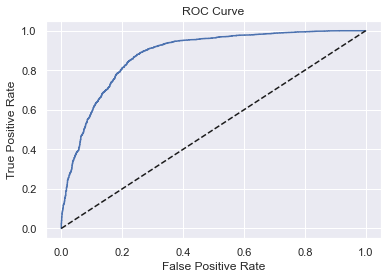

In [138]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color= 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

## AUC, -- Area Under the Curve, is the area under the blue curve

In [139]:
AUROC = roc_auc_score(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_proba'])
AUROC

0.8783816912463794